<a href="https://colab.research.google.com/github/m-rafiul-islam/driver-behavior-model/blob/main/analyze_results_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import pandas as pd

In [3]:
# url = 'https://raw.githubusercontent.com/m-rafiul-islam/driver-behavior-model/data/parameter_estimation_combined_data_version10.csv'
url = 'https://raw.githubusercontent.com/m-rafiul-islam/driver-behavior-model/main/parameter_estimation_combined_data_parameter_estimation23.csv'
data = pd.read_csv(url) 


In [4]:
data.dropna(inplace=True)

In [5]:
data.describe()

,alpha,delta,objective,initial_position_LV,initial_velocity,s0,V_0,car,acc_co,dec_co
count,376.000000,376.000000,376.000000,376.0,376.000000,376.0,376.0,376.00000,376.000000,376.000000
mean,0.822965,4.901473,6623.973738,113.0,9.406915,30.0,20.0,300.37234,0.775878,0.863810
std,0.211569,1.699144,5252.701474,0.0,2.932458,0.0,0.0,57.75405,0.421700,0.469493
min,0.363415,2.008420,3043.168531,113.0,5.000000,30.0,20.0,202.00000,0.020000,0.022267
25%,0.585799,3.514157,3368.231052,113.0,7.000000,30.0,20.0,250.75000,0.437500,0.487083
50%,0.998815,4.856863,3866.824298,113.0,9.000000,30.0,20.0,300.00000,0.740000,0.823867
75%,1.000000,6.400853,7942.129587,113.0,12.000000,30.0,20.0,350.25000,1.150000,1.280333
max,1.000000,7.988869,30002.208371,113.0,14.000000,30.0,20.0,400.00000,1.490000,1.658867


In [6]:
data_ODE = data[data['alpha']==1].reset_index()
data_FDE = data[data['alpha']!=1].reset_index() 

In [7]:
data_FDE.describe() 

,index,alpha,delta,objective,initial_position_LV,initial_velocity,s0,V_0,car,acc_co,dec_co
count,199.000000,199.000000,199.000000,199.000000,199.0,199.000000,199.0,199.0,199.000000,199.000000,199.000000
mean,199.000000,0.665501,5.008982,3608.274494,113.0,9.417085,30.0,20.0,300.527638,0.776181,0.864148
std,115.181017,0.178432,1.691251,411.201084,0.0,2.951101,0.0,0.0,57.382097,0.420534,0.468195
min,1.000000,0.363415,2.028361,3043.168531,113.0,5.000000,30.0,20.0,202.000000,0.020000,0.022267
25%,100.000000,0.525026,3.715150,3333.790275,113.0,7.000000,30.0,20.0,251.500000,0.440000,0.489867
50%,199.000000,0.597196,4.966477,3587.108999,113.0,9.000000,30.0,20.0,300.000000,0.740000,0.823867
75%,298.000000,0.800371,6.533543,3801.329720,113.0,12.000000,30.0,20.0,349.500000,1.140000,1.269200
max,397.000000,0.999983,7.988869,5845.142253,113.0,14.000000,30.0,20.0,400.000000,1.490000,1.658867


In [8]:
data_ODE.describe()

,index,alpha,delta,objective,initial_position_LV,initial_velocity,s0,V_0,car,acc_co,dec_co
count,177.000000,177.0,177.000000,177.000000,177.0,177.000000,177.0,177.0,177.000000,177.000000,177.000000
mean,203.943503,1.0,4.780601,10014.505657,113.0,9.395480,30.0,20.0,300.197740,0.775537,0.863431
std,113.934078,0.0,1.704652,6062.442205,0.0,2.919679,0.0,0.0,58.331833,0.424201,0.472277
min,0.000000,1.0,2.008420,3114.971220,113.0,5.000000,30.0,20.0,202.000000,0.020000,0.022267
25%,110.000000,1.0,3.379556,3927.942358,113.0,7.000000,30.0,20.0,250.000000,0.430000,0.478733
50%,208.000000,1.0,4.675860,9194.609867,113.0,9.000000,30.0,20.0,300.000000,0.740000,0.823867
75%,302.000000,1.0,6.253128,14123.284565,113.0,12.000000,30.0,20.0,351.000000,1.150000,1.280333
max,394.000000,1.0,7.972008,30002.208371,113.0,14.000000,30.0,20.0,400.000000,1.490000,1.658867


In [9]:
data_FDE

,index,alpha,delta,objective,initial_position_LV,initial_velocity,s0,V_0,car,acc_co,dec_co,com_time
0,1,0.999041,3.780758,3373.381977,113,14.0,30,20,279,1.08,1.202400,0 days 00:15:43.349067000
1,3,0.999041,3.780758,3373.381977,113,14.0,30,20,279,1.08,1.202400,0 days 00:15:43.349067000
2,5,0.591711,3.697231,3497.722126,113,9.0,30,20,251,1.32,1.469600,0 days 00:11:51.075400000
3,7,0.935871,3.895272,3103.584586,113,13.0,30,20,245,1.49,1.658867,0 days 00:11:44.376529000
4,9,0.511570,7.963185,3877.269611,113,6.0,30,20,292,1.13,1.258067,0 days 00:12:00.552557000
...,...,...,...,...,...,...,...,...,...,...,...,...
194,389,0.641223,5.669438,3478.171502,113,10.0,30,20,314,0.47,0.523267,0 days 00:13:32.152295000
195,391,0.602272,7.988869,3587.108999,113,9.0,30,20,300,1.42,1.580933,0 days 00:16:49.715330000
196,393,0.805563,2.813582,3211.835842,113,12.0,30,20,248,1.03,1.146733,0 days 00:11:46.529743000
197,395,0.640305,5.832892,3386.838290,113,10.0,30,20,260,1.32,1.469600,0 days 00:11:51.593380000


In [17]:
# data_FDE['alpha'].hist(bins=100)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

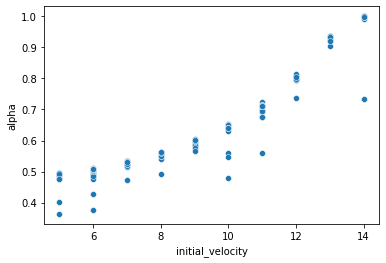

In [16]:
sns.scatterplot(x='initial_velocity',y='alpha',data=data_FDE) 

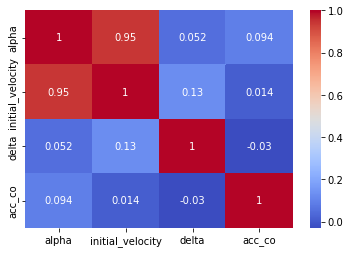

In [25]:
# sns.heatmap(data_FDE.drop(columns='index').corr())

corr_matrix = data_FDE[['alpha','initial_velocity','delta','acc_co']].corr() 
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)


** END ** 


** END **


```
# This is formatted as code
```



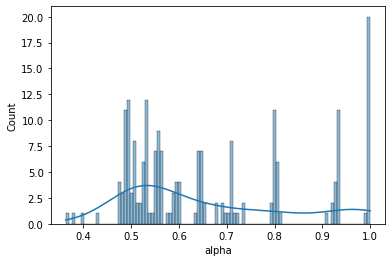

In [12]:
sns.histplot(data_FDE['alpha'], bins = 100,kde = True)

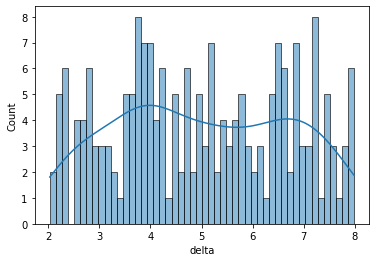

In [13]:
sns.histplot(data_FDE['delta'], bins = 50,kde = True)

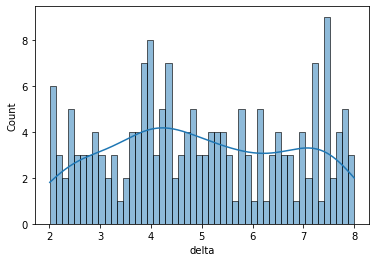

In [ ]:
sns.histplot(data_ODE['delta'], bins = 50,kde = True)

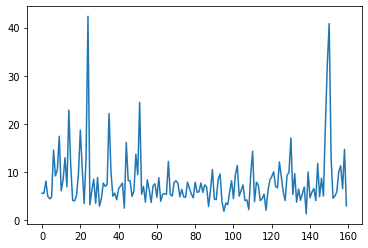

In [ ]:
fig, ax = plt.subplots()
ax = (data_ODE['objective']/data_FDE['objective']).plot()


In [ ]:
import numpy as np

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(range(len(data_ODE['objective'])),np.array(data_ODE['objective']),'blue') 
# ax2= plt.twinx()
# ax2.plot(range(len(data_FDE['objective'])),np.array(data_FDE['objective']),'green') 

In [ ]:
# plt.figure() 
# plt.plot(range(len(data_ODE['objective'])),np.array(data_ODE['objective']),'blue') 
# plt.plot(range(len(data_FDE['objective'])),np.array(data_FDE['objective']),'green')

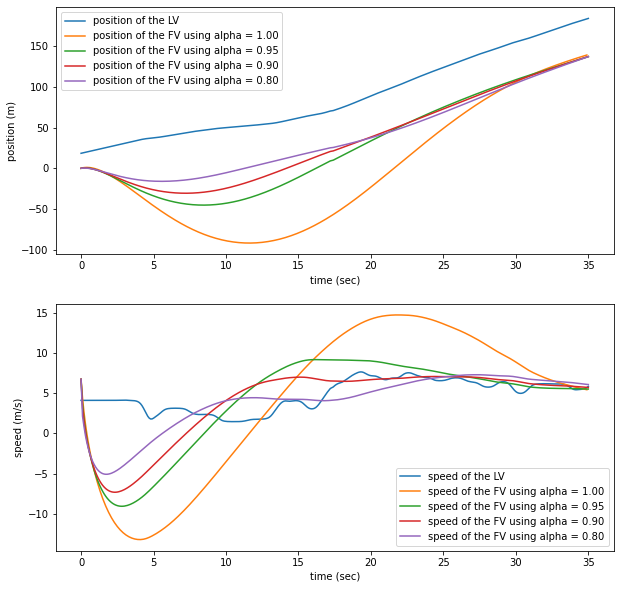

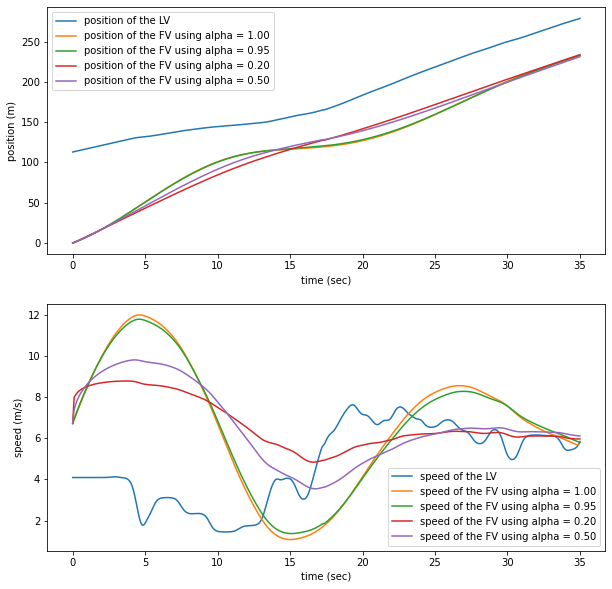